# Mount Google Drive & Load the Dataset

First, we need to load the dataset from Google Drive into Google Colab. This step allows us to access and process the signature data stored in the file.

In [ ]:
from google.colab import drive
import pandas as pd

#mount Google Drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/mcytTraining.txt"
df = pd.read_csv(file_path, delimiter=",", header=0)
#display first few rows
df.head()

Mounted at /content/drive


,ID,SigID,X,Y,P,al,az,signatureOrigin
0,User0099,0099v05,29.850886,62.822232,42.751237,145.268870,86.042146,Genuine
1,User0099,0099v05,29.261045,39.342905,55.144064,127.854617,79.195756,Genuine
2,User0099,0099v05,45.561034,59.324443,56.892055,160.271755,87.879540,Genuine
3,User0099,0099v05,42.437961,46.173119,47.803956,182.199390,95.509492,Genuine
4,User0099,0099v05,39.708959,38.274359,44.461487,125.456784,148.468589,Genuine


The dataset has been successfully loaded. Next, we'll check its structure to make sure it's formatted correctly.

#Inspect Dataset Structure

Now, we check the dataset’s shape, column names, and data types. This helps us understand what features are available and whether we need any preprocessing.

In [ ]:
print(f"Dataset Shape: {df.shape}")
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

#list of unique users
unique_users = df['ID'].unique()
print(f"\nTotal Unique Users: {len(unique_users)}")
print(f"Sample User IDs: {unique_users[:10]}")

Dataset Shape: (20000, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                20000 non-null  object 
 1    SigID            20000 non-null  object 
 2    X                20000 non-null  float64
 3    Y                20000 non-null  float64
 4    P                20000 non-null  float64
 5   al                20000 non-null  float64
 6   az                20000 non-null  float64
 7    signatureOrigin  20000 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.2+ MB

Missing Values:
ID                  0
 SigID              0
 X                  0
 Y                  0
 P                  0
al                  0
az                  0
 signatureOrigin    0
dtype: int64

Total Unique Users: 100
Sample User IDs: ['User0099' 'User0001' 'User0002' 'User0003' 'User0004' 'User0005'
 'User0006' 'U

The dataset consists of 20,000 rows/entries and 8 columns. There are no missing values, so we can proceed directly with the analysis.

In [ ]:
# removing the spaces from the column names
df.columns = df.columns.str.strip()
print("Cleaned Column Names:", df.columns.tolist())

Cleaned Column Names: ['ID', 'SigID', 'X', 'Y', 'P', 'al', 'az', 'signatureOrigin']


#Checking Signature Distribution

Here we check the number of genuine and forged signatures. This is important to confirm that the dataset is balanced and that we have enough data for both categories.


Actual Number of Unique Signatures:
signatureOrigin
Forged     2000
Genuine    2000
Name: count, dtype: int64


<ipython-input-17-e71eb4764e44>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=signature_counts.index, y=signature_counts.values, palette={"Genuine": "blue", "Forged": "red"})


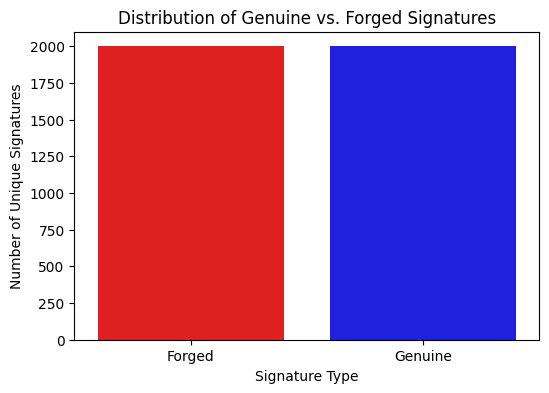

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#counting the unique signatures
unique_signatures = df.groupby(["ID", "SigID"])["signatureOrigin"].first().reset_index()

#counting the number of genuine and forged signatures
signature_counts = unique_signatures["signatureOrigin"].value_counts()

print("\nActual Number of Unique Signatures:")
print(signature_counts)

#plotting
plt.figure(figsize=(6, 4))
sns.barplot(x=signature_counts.index, y=signature_counts.values, palette={"Genuine": "blue", "Forged": "red"})

plt.title("Distribution of Genuine vs. Forged Signatures")
plt.ylabel("Number of Unique Signatures")
plt.xlabel("Signature Type")
plt.show()

there is an equal number of genuine and firged signatures, this is good for training as the model won't be biased toward a specific signature type.

#Ensure each user has both genuine and forged signatures




In [ ]:
#count genuine vs forged signatures/user
user_signature_counts = df.groupby(['ID', 'signatureOrigin']).size().unstack()

print("\nSignature Count per User:")
print(user_signature_counts.head(10))


Signature Count per User:
signatureOrigin  Forged  Genuine
ID                              
User0000            100      100
User0001            100      100
User0002            100      100
User0003            100      100
User0004            100      100
User0005            100      100
User0006            100      100
User0007            100      100
User0008            100      100
User0009            100      100


In [ ]:
#number of coordinate points per signature i.e number of rows for each signature
sig_point_counts = df.groupby(['ID', 'SigID']).size().reset_index(name='Point Count')

print(sig_point_counts.head(10))


          ID    SigID  Point Count
0   User0000  0000f00            5
1   User0000  0000f01            5
2   User0000  0000f02            5
3   User0000  0000f03            5
4   User0000  0000f04            5
5   User0000  0000f05            5
6   User0000  0000f06            5
7   User0000  0000f07            5
8   User0000  0000f08            5
9   User0000  0000f09            5
10  User0000  0000f10            5
11  User0000  0000f11            5
12  User0000  0000f12            5
13  User0000  0000f13            5
14  User0000  0000f14            5
15  User0000  0000f15            5
16  User0000  0000f16            5
17  User0000  0000f17            5
18  User0000  0000f18            5
19  User0000  0000f19            5
20  User0000  0000v05            5
21  User0000  0000v06            5
22  User0000  0000v07            5
23  User0000  0000v08            5
24  User0000  0000v09            5
25  User0000  0000v10            5
26  User0000  0000v11            5
27  User0000  0000v1

there are five coordinate points per signature

#Signature Trajectory Visualization

To get a better understanding of the signature data, we plot the X and Y coordinates of a genuine and a forged signature. This will help us see if there are noticeable differences in stroke patterns.

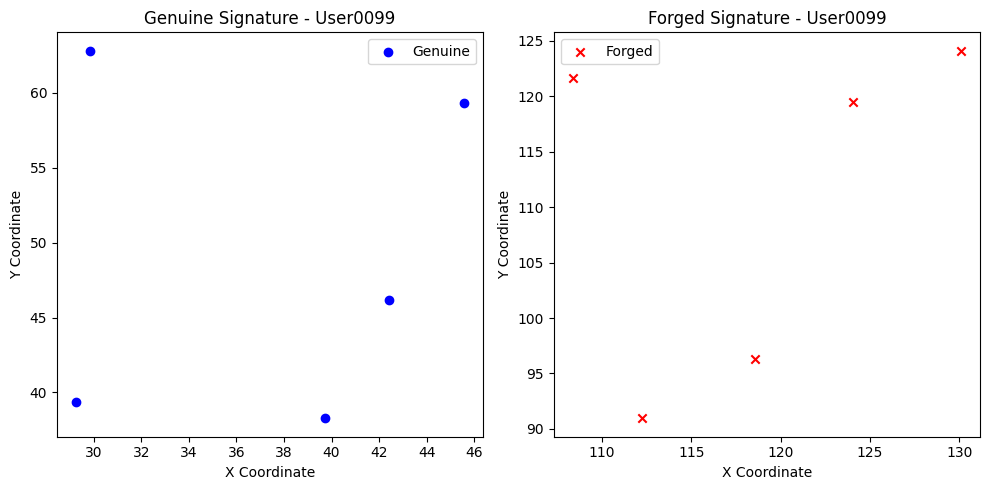

In [ ]:
import matplotlib.pyplot as plt

#selecting a user and their first genuine vs forged signature
sample_user = df['ID'].unique()[0] #first user
user_data = df[df['ID'] == sample_user]


genuine_sig = user_data[(user_data['signatureOrigin'] == "Genuine")].iloc[:5]
forged_sig = user_data[(user_data['signatureOrigin'] == "Forged")].iloc[:5]

#plot
plt.figure(figsize=(10, 5))
#genuine signature
plt.subplot(1, 2, 1)
plt.scatter(genuine_sig['X'], genuine_sig['Y'], color='blue', marker='o', label="Genuine")
plt.title(f"Genuine Signature - {sample_user}")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
#forged signature
plt.subplot(1, 2, 2)
plt.scatter(forged_sig['X'], forged_sig['Y'], color='red', marker='x', label="Forged")
plt.title(f"Forged Signature - {sample_user}")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.tight_layout()
plt.show()

The visualization shows that the forged signature appears offset from the genuine one. This could be because of the preprocessing effects or differences in how the signatures were written. more analysis is needed to determine if these patterns are consistent across all users.

# Pen Pressure (P) Analysis

Next, we analyze pen pressure (P) to see if its different between genuine and forged signatures. We use a KDE (density) plot to visualize the distribution

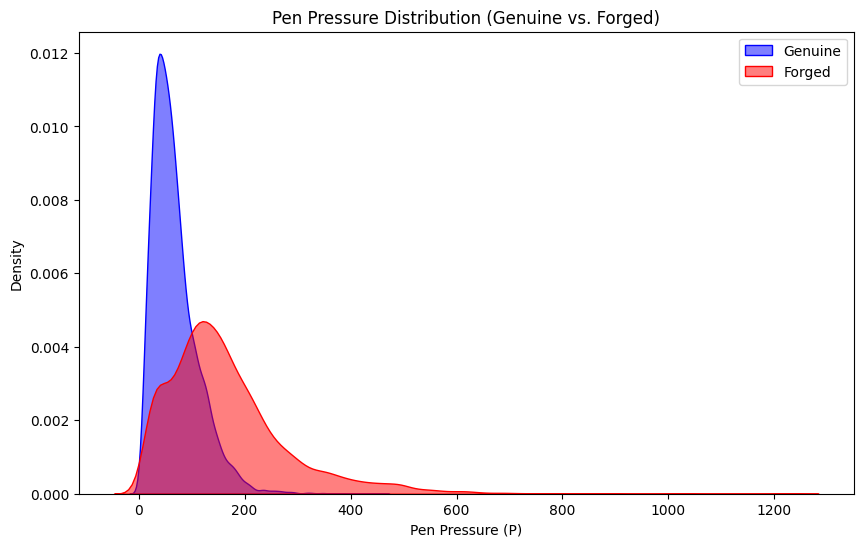

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

#plot the KDE distributions
sns.kdeplot(df[df['signatureOrigin'] == "Genuine"]['P'], label="Genuine", fill=True, color="blue", alpha=0.5)
sns.kdeplot(df[df['signatureOrigin'] == "Forged"]['P'], label="Forged", fill=True, color="red", alpha=0.5)

plt.title("Pen Pressure Distribution (Genuine vs. Forged)")
plt.xlabel("Pen Pressure (P)")
plt.ylabel("Density")
plt.legend()
plt.show()


Results:

Genuine signatures (blue) have lower, more consistent pressure.
Forged signatures (red) have higher pressure on average and wider variation.
Possible reason: Forgers apply more force to get the signature correctly.

#Scatter Plot of (X, Y) vs. Pressure (P)

Now, we visualize how pressure is distributed across the signature strokes. This scatter plot will help us see if pressure is applied consistently throughout the signature.

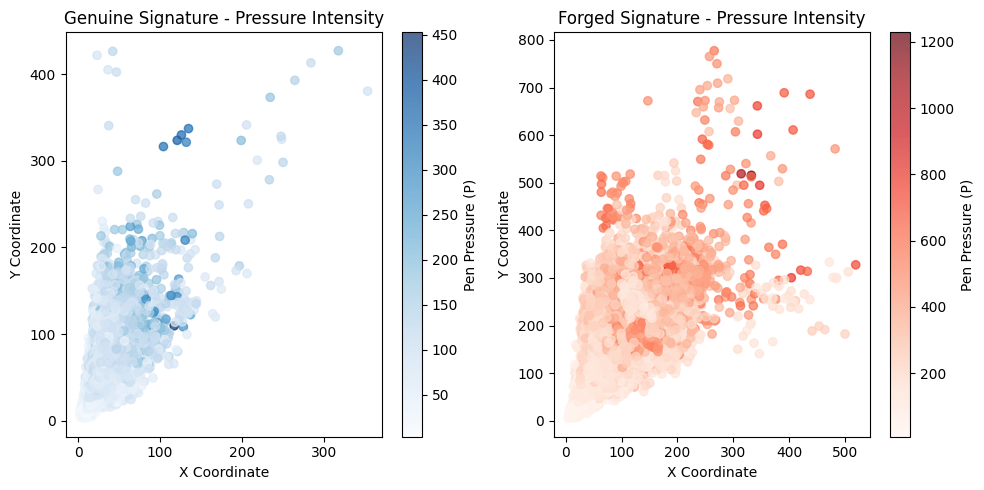

In [ ]:
plt.figure(figsize=(10, 5))

#for genuine signatures
plt.subplot(1, 2, 1)
plt.scatter(df[df['signatureOrigin'] == "Genuine"]['X'], df[df['signatureOrigin'] == "Genuine"]['Y'],
            c=df[df['signatureOrigin'] == "Genuine"]['P'], cmap='Blues', alpha=0.7)
plt.colorbar(label="Pen Pressure (P)")
plt.title("Genuine Signature - Pressure Intensity")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

#for forged signatures
plt.subplot(1, 2, 2)
plt.scatter(df[df['signatureOrigin'] == "Forged"]['X'], df[df['signatureOrigin'] == "Forged"]['Y'],
            c=df[df['signatureOrigin'] == "Forged"]['P'], cmap='Reds', alpha=0.7)
plt.colorbar(label="Pen Pressure (P)")
plt.title("Forged Signature - Pressure Intensity")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

plt.tight_layout()
plt.show()


Genuine signatures (left): Pressure is evenly distributed, with fewer high-pressure points.

Forged signatures (right): Show higher pressure variations (more dark red points), This could indicate hesitation or unnatural writing movements by forgers."

#Altitude (al) & Azimuth (az) Analysis


Altitude (al) and Azimuth (az) represent the pen's angle while writing. Here, we compare their distributions for genuine vs. forged signatures to see if forgers hold the pen differently.

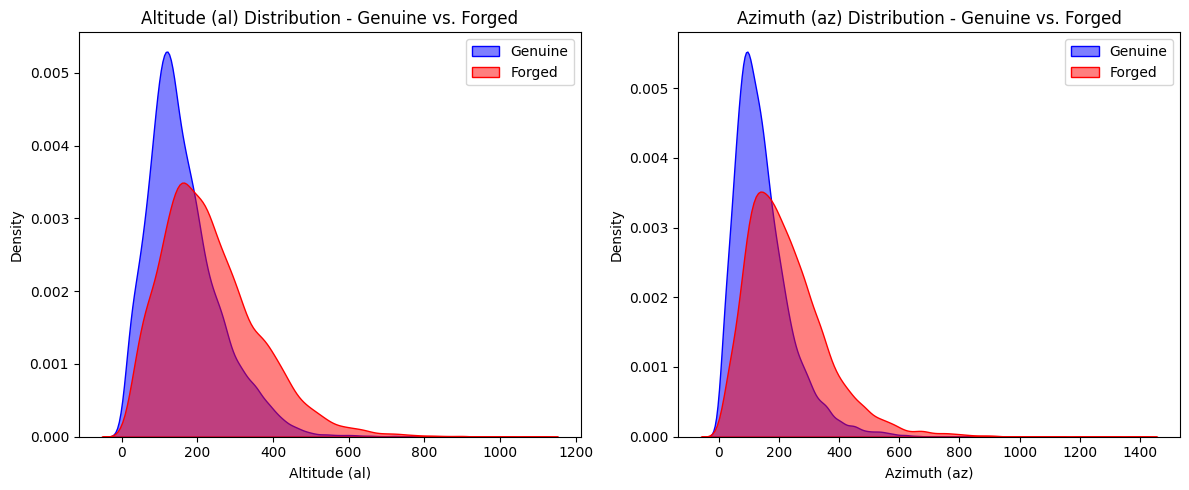

In [ ]:
plt.figure(figsize=(12, 5))

# Altitude (al) Distribution
plt.subplot(1, 2, 1)
sns.kdeplot(df[df['signatureOrigin'] == "Genuine"]['al'], label="Genuine", fill=True, color="blue", alpha=0.5)
sns.kdeplot(df[df['signatureOrigin'] == "Forged"]['al'], label="Forged", fill=True, color="red", alpha=0.5)
plt.title("Altitude (al) Distribution - Genuine vs. Forged")
plt.xlabel("Altitude (al)")
plt.ylabel("Density")
plt.legend()

# Azimuth (az) Distribution
plt.subplot(1, 2, 2)
sns.kdeplot(df[df['signatureOrigin'] == "Genuine"]['az'], label="Genuine", fill=True, color="blue", alpha=0.5)
sns.kdeplot(df[df['signatureOrigin'] == "Forged"]['az'], label="Forged", fill=True, color="red", alpha=0.5)
plt.title("Azimuth (az) Distribution - Genuine vs. Forged")
plt.xlabel("Azimuth (az)")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


The distributions suggest that altitude and azimuth values are slightly different in forgeries. This could indicate that forgers struggle to maintain natural pen angles.

In [ ]:
print("Column Names in DataFrame:", df.columns.tolist())

Column Names in DataFrame: ['ID', 'SigID', 'X', 'Y', 'P', 'al', 'az', 'signatureOrigin']


#Statistical Analysis: Are the Differences Significant?

To validate whether the differences in **pen pressure (P), altitude (al), and azimuth (az)** between genuine and forged signatures are statistically significant, the following steps were performed:

1.We use the **Shapiro-Wilk test** to determine if the data follows a normal distribution.
2. - If normal → Perform **T-Test** (parametric test).
   - If non-normal → Perform **Mann–Whitney U Test** (non-parametric alternative).
3. **Interpret the p-values:**
   - If **p < 0.05**, the difference is **statistically significant**, meaning the feature can help differentiate genuine and forged signatures.
   - If **p ≥ 0.05**, there is **no significant difference** between the groups.


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import shapiro

#checking if the data is normally distributed (Shapiro-Wilk Test)
def check_normality(data, column_name):
    stat, p = shapiro(data[column_name])
    print(f"{column_name} Normality Test: p-value = {p}")
    return p > 0.05  # Returns True if normal, False if not

# Function to compare a feature between genuine and forged signatures
def compare_feature(df, feature):
    genuine = df[df['signatureOrigin'] == "Genuine"][feature]
    forged = df[df['signatureOrigin'] == "Forged"][feature]

    print(f"\nPerforming statistical test for {feature}:")

    # Check normality to determine which test to use
    if check_normality(df, feature):
        stat, p_value = ttest_ind(genuine, forged, equal_var=False)  # Welch’s t-test
        test_type = "T-Test"
    else:
        stat, p_value = mannwhitneyu(genuine, forged, alternative="two-sided")  # Mann-Whitney U Test
        test_type = "Mann–Whitney U Test"

    print(f"{test_type} for {feature}: p-value = {p_value}")
    if p_value < 0.05:
        print(f"Significant difference detected in {feature} between genuine and forged signatures!")
    else:
        print(f"No significant difference found in {feature}.")
    print("-" * 50)


for feature in ['P', 'al', 'az']:
    compare_feature(df, feature)


Performing statistical test for P:
P Normality Test: p-value = 4.4783164340535e-91
Mann–Whitney U Test for P: p-value = 0.0
Significant difference detected in P between genuine and forged signatures!
--------------------------------------------------

Performing statistical test for al:
al Normality Test: p-value = 8.87207826916708e-70
Mann–Whitney U Test for al: p-value = 0.0
Significant difference detected in al between genuine and forged signatures!
--------------------------------------------------

Performing statistical test for az:
az Normality Test: p-value = 7.265813075335981e-79
Mann–Whitney U Test for az: p-value = 0.0
Significant difference detected in az between genuine and forged signatures!
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20000.
  res = hypotest_fun_out(*samples, **kwds)


The statistical tests confirm significant differences between genuine and forged signatures for all three features:

Pen Pressure (P): p-value = 0.0 → Forged signatures have higher pressure and greater variability.

Altitude (al): p-value = 0.0 → Forgers hold the pen at different angles, leading to inconsistencies.

Azimuth (az): p-value = 0.0 → Forgers struggle to replicate natural wrist movements, causing wider variation.

These results align with the box plots below, ensuring that P, al, and az are strong distinguishing features. This statistical validation supports their use in machine learning models for signature verification.

____________________________________________________________________________



This code generates box plots to compare Pen Pressure (P), Altitude (al), and Azimuth (az) between genuine and forged signatures. The goal is to visualize differences in writing pressure and pen movement patterns, highlighting variations in median values, spread, and outliers.



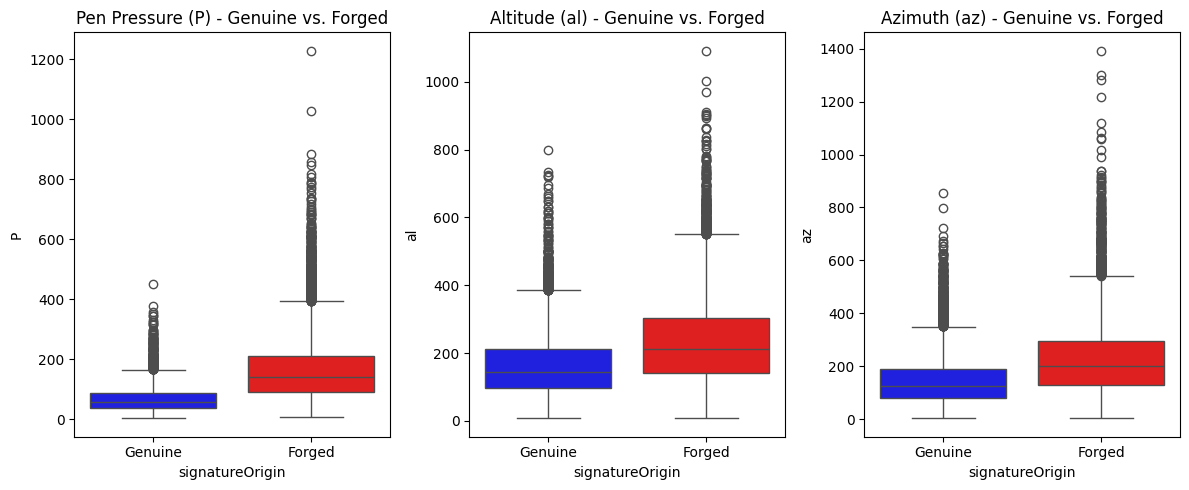

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

#Pen Pressure (P)
plt.subplot(1, 3, 1)
sns.boxplot(x="signatureOrigin", y="P", data=df, hue="signatureOrigin", palette={"Genuine": "blue", "Forged": "red"})
plt.title("Pen Pressure (P) - Genuine vs. Forged")

#Altitude (al)
plt.subplot(1, 3, 2)
sns.boxplot(x="signatureOrigin", y="al", data=df, hue="signatureOrigin", palette={"Genuine": "blue", "Forged": "red"})
plt.title("Altitude (al) - Genuine vs. Forged")

#Azimuth (az)
plt.subplot(1, 3, 3)
sns.boxplot(x="signatureOrigin", y="az", data=df, hue="signatureOrigin", palette={"Genuine": "blue", "Forged": "red"})
plt.title("Azimuth (az) - Genuine vs. Forged")

plt.tight_layout()
plt.show()


The box plots show clear differences between genuine and forged signatures. Forgers apply more pressure, hold the pen at higher altitudes, and exhibit greater variation in azimuth. The wider spread and more outliers in forged signatures suggest inconsistencies in replication. These findings align with statistical tests, confirming that these features can help differentiate genuine and forged signatures.

#Feature Correlation Heatmap


Next, we analyze how different features (X, Y, P, al, az) correlate with each other. This heatmap will help us understand which features are related and might be useful for classification.

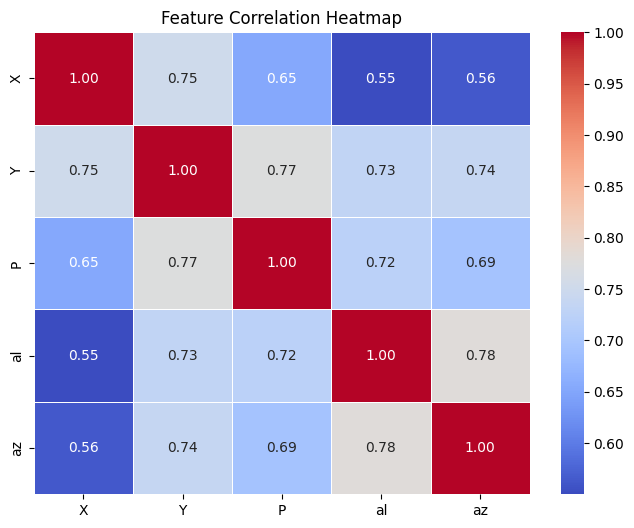

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

#compute correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap shows that pen pressure (P) is moderately correlated with altitude (al). Azimuth (az) and altitude (al) are also strongly related, which makes sense since both describe pen movement angles

#Correlation Heatmap for Genuine vs. Forged Signatures

To better understand how forgeries differ from genuine signatures, we create separate correlation heatmaps for each signature type. This will help us see if the relationships between features change in forgeries.

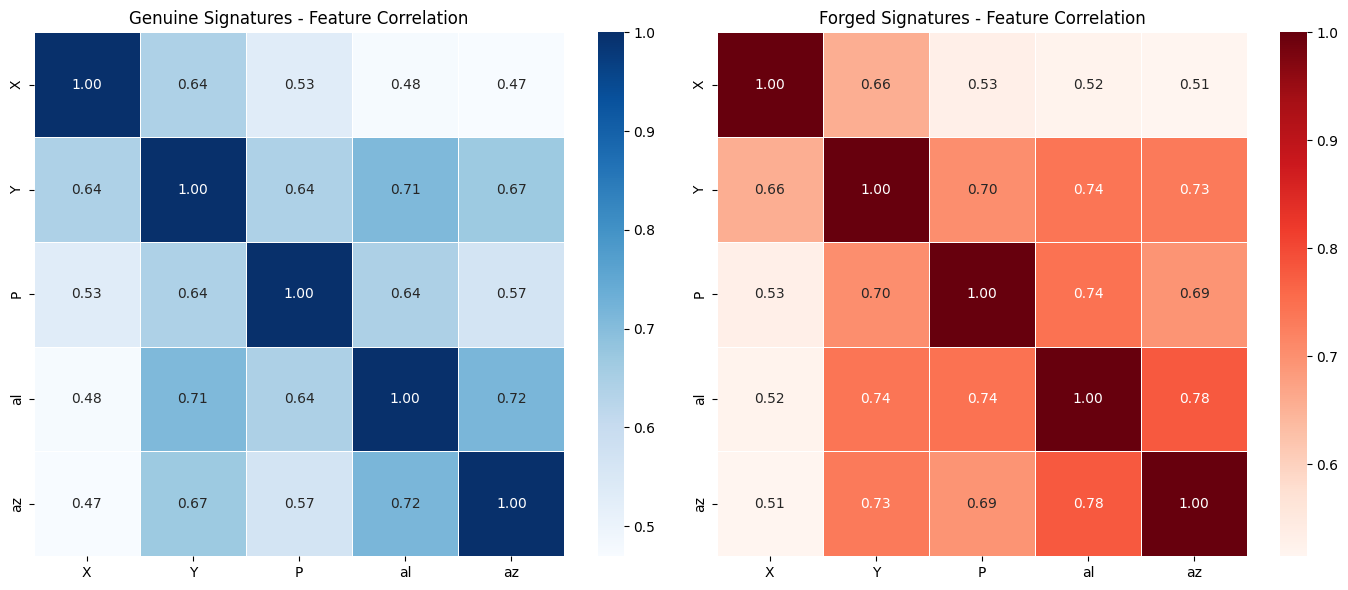

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#separate genuine and forged data
genuine_df = df[df['signatureOrigin'] == "Genuine"].select_dtypes(include=[np.number])
forged_df = df[df['signatureOrigin'] == "Forged"].select_dtypes(include=[np.number])

#Compute correlation matrices
genuine_corr = genuine_df.corr()
forged_corr = forged_df.corr()

# Create two heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Genuine signature correlation heatmap
sns.heatmap(genuine_corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Genuine Signatures - Feature Correlation")

# Forged signature correlation heatmap
sns.heatmap(forged_corr, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Forged Signatures - Feature Correlation")

plt.tight_layout()
plt.show()


The correlation structures are noticeably different. In forgeries, pen pressure (P) has a stronger correlation with Y and altitude (al). This suggests that forgers may unintentionally apply pressure inconsistently while adjusting pen angles, making these features useful for classification.

# Conclusion
This exploratory analysis of online signature data reveals that pen pressure (P), altitude (al), and azimuth (az) are consistently and statistically different between genuine and forged signatures. Specifically, forged signatures exhibit higher average pressure, greater variability in pen angles, and sometimes offset trajectories that deviate from genuine writing patterns.

From a machine learning perspective, these findings strongly suggest that P, al, and az can serve as valuable input features for differentiating genuine from forged signatures. The Mann–Whitney U tests (all p-values < 0.05) confirm their predictive utility, while correlation heatmaps indicate that forgers unintentionally introduce distinct relationships among these variables. This combination of visual analysis, statistical significance, and feature interdependence provides a solid basis for high model accuracy in a classification task.

However, the dataset’s limitation of five coordinate points per signature constrains the depth of temporal or velocity-based insights. Future work could benefit from more extensive data capturing stroke progression, which would enable a richer examination of dynamic writing behaviors. Despite these constraints, the results presented here underscore the importance of pen-pressure- and angle-related measures for online signature verification, offering a clear direction for building robust, data-driven authentication models.

